<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_08/Lecture_01/CodeAlong/CodeAlong_Logistic_Regression_and_ROCAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

Here is the link for where the data is found: https://www.kaggle.com/mlg-ulb/creditcardfraud

This dataset is on credit card fraud from kaggle.

In [ ]:
# Load in Data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Lectures - Live Class Materials/Stack 2/Week 8/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Look at info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check for duplicates
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check class balance numbers
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
# Check class balance percentages
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [ ]:
# Define X features and y target
X = df.drop(columns = 'Class')
y = df['Class']

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [ ]:
# Instantiate standard scaler
scaler = StandardScaler()

# Baseline Model

In [ ]:
# instantiate dummy classifier, pipeline and fit pipeline
dummy = DummyClassifier(strategy = 'stratified', random_state=42)

dummy_pipe = make_pipeline(scaler, dummy)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [ ]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=3, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes,
                                        ax=ax[0])
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  
  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  curve.ax_.grid()
  curve.ax_.plot([0, 1], [0, 1], ls=':')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.00      0.00      0.00       118

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


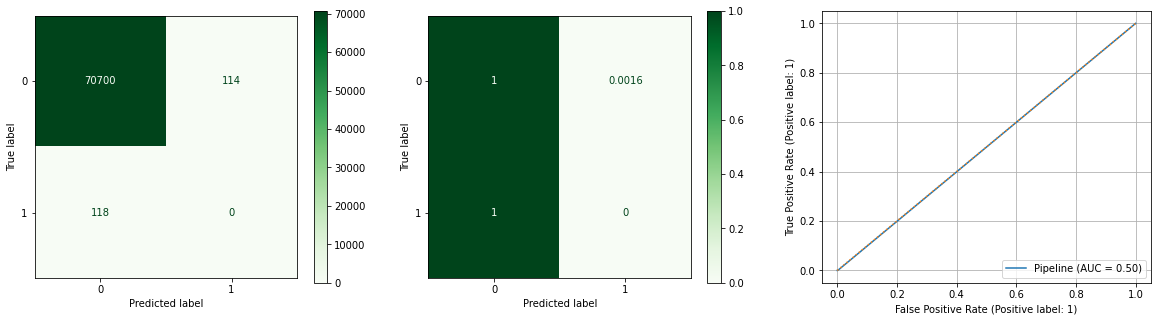

In [ ]:
# Evaluate function on the dummy pipe
evaluate_classification(dummy_pipe, X_test, y_test)

# Logistic Regression Model


In [ ]:
# Instantiate a logistic regression model
# Make a pipeline with the model
logreg = LogisticRegression()

logreg_pipe = make_pipeline(scaler, logreg)

In [ ]:
# Fit the logistic regression pipe
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# Look at the predictions using .predict()
preds = logreg_pipe.predict(X_test[:5])
preds

array([0, 0, 0, 0, 0])

In [ ]:
# Take a look at the predicted probabilities using .predict_proba
probs = logreg_pipe.predict_proba(X_test[:5])
np.set_printoptions(suppress=True)
probs

array([[0.99998486, 0.00001514],
       [0.99978716, 0.00021284],
       [0.99951287, 0.00048713],
       [0.99977307, 0.00022693],
       [0.99990884, 0.00009116]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.84      0.59      0.70       118

    accuracy                           1.00     70932
   macro avg       0.92      0.80      0.85     70932
weighted avg       1.00      1.00      1.00     70932



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


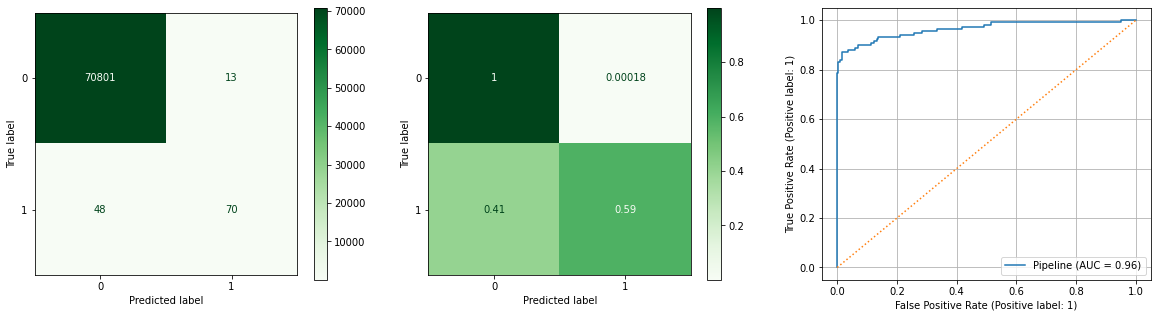

In [ ]:
# Evaluate the logistic regression pipe using function
evaluate_classification(logreg_pipe, X_test, y_test)

# GridSearchCV

In [ ]:
logreg2 = LogisticRegression()

logreg_pipe2 = make_pipeline(scaler, logreg2)

Sklearn metrics documentation for scoring Gridsearch parameter https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Create a paramater grid for GridSearchCV and instantiate object
params = {'logisticregression__C': [1,10],
          'logisticregression__penalty':['l1', 'l2'],
          'logisticregression__solver':['liblinear']}

logreg_grid = GridSearchCV(logreg_pipe2, params)
logreg_grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [1, 10],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']})

In [ ]:
# Fit gridsearch object on the X_train and y_train
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [1, 10],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']})

In [ ]:
# Get out the best parameters
logreg_grid.best_params_

{'logisticregression__C': 10,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [ ]:
# Get out the best model
best_logreg = logreg_grid.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.84      0.59      0.70       118

    accuracy                           1.00     70932
   macro avg       0.92      0.80      0.85     70932
weighted avg       1.00      1.00      1.00     70932



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


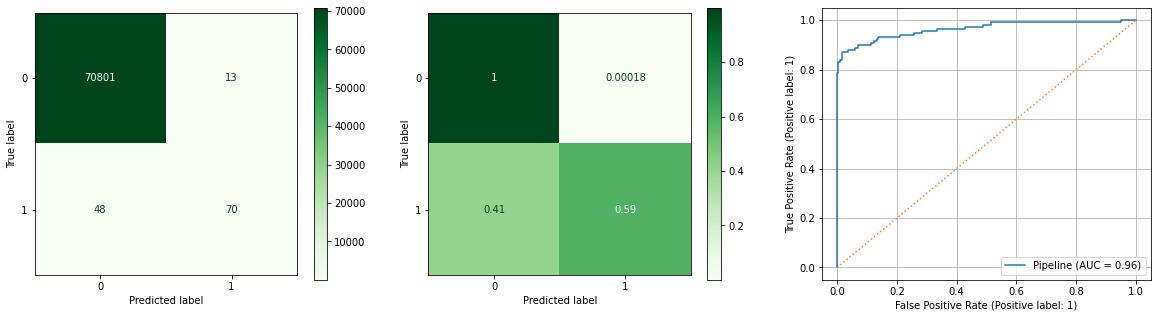

In [ ]:
# Evaluate GridSearch Object using function
evaluate_classification(best_logreg, X_test, y_test)

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [ ]:
pd.Series(y_train).value_counts()

0    212439
1       355
Name: Class, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 'auto')

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts()

0    212439
1    212439
Name: Class, dtype: int64

In [ ]:
smote_logreg = LogisticRegression(max_iter = 1000)
smote_logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.09      0.87      0.16       118

    accuracy                           0.99     70932
   macro avg       0.54      0.93      0.58     70932
weighted avg       1.00      0.99      0.99     70932



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


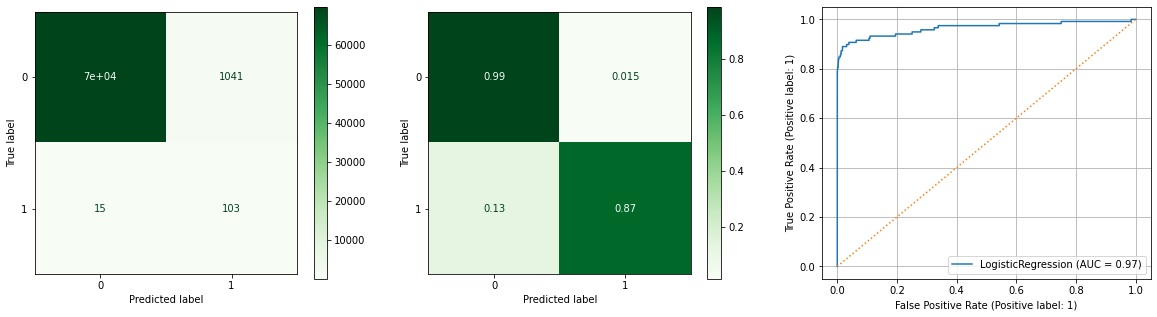

In [ ]:
evaluate_classification(smote_logreg, X_test, y_test)

# Logistic Regression Model with Class Weight Balanced

In [ ]:
# Instantiate a logistic regression model using class_weight = 'balanced'
# Make a pipeline with the model
logreg3 = LogisticRegression(class_weight='balanced')

logreg_pipe3 = make_pipeline(scaler, logreg3)

In [ ]:
# Fit the logistic regression pipe
logreg_pipe3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.06      0.89      0.10       118

    accuracy                           0.97     70932
   macro avg       0.53      0.93      0.55     70932
weighted avg       1.00      0.97      0.99     70932



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


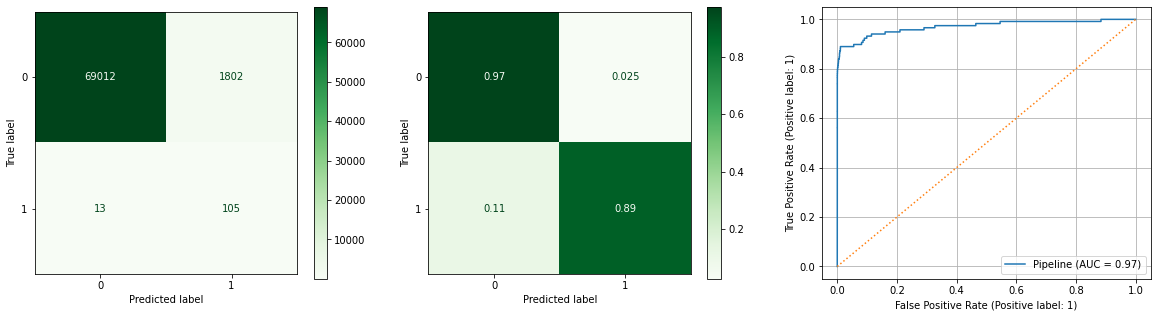

In [ ]:
# Evaluate the logistic regression pipe using function
evaluate_classification(logreg_pipe3, X_test, y_test)